# 3 Problemset 

Load libraries. No need for GPU support. 

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 3.6 Gradient descent of quadratic functions

Recall from problem 3.5 that quadratic functions have linear gradients: for any $2\times 2$ matrix $A$, one has
$$f:\mathbb R^2\to\mathbb R^2,\qquad f(x)=x^\top Ax, \qquad \nabla f(x) = (A+A^\top)x.$$
Here is a plot of $f$ and some of its gradient descent (or rather gradient flow) trajectories.

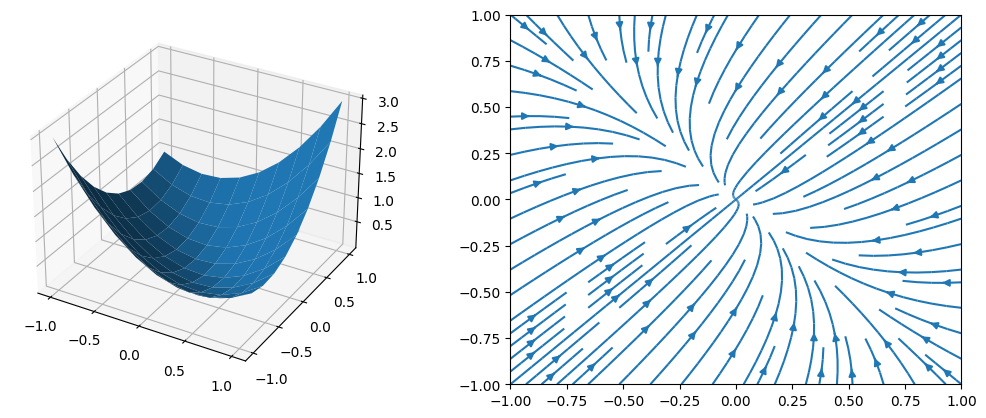

In [2]:
def plot_gradient_flow(A):
  x = np.mgrid[-1:1:10j, -1:1:10j][[1,0]]
  f = np.einsum('ikl,ij,jkl->kl', x, A, x)
  B = -(A+A.transpose())
  grad = np.einsum('ij,jkl->ikl', B, x)
  fig = plt.figure(figsize=[2*6.4, 4.8])
  ax = fig.add_subplot(121, projection='3d')
  ax.plot_surface(x[0], x[1], f)
  ax = fig.add_subplot(122)
  ax.streamplot(x[0], x[1], grad[0], grad[1])
  plt.show()

A = np.array([[1, 1], [0, 1]])
plot_gradient_flow(A)

Experiment with various matrices $A$. Verify that the anti-symmetric part of $A$ does not matter, and use only symmetric matrices from there on. Try to find out under what conditions the gradient flow converges. Hint: This depends on the eigenvalues of $A$. 

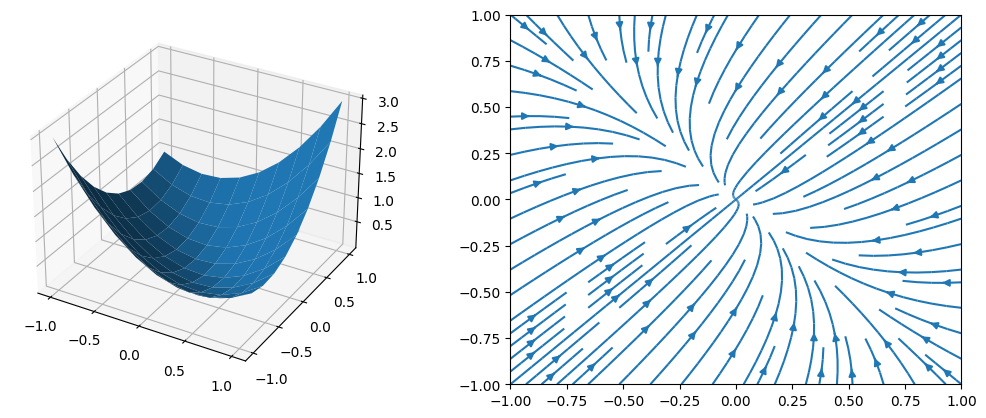

In [3]:
B = np.array([[1, 0], [1, 1]])
plot_gradient_flow(B)

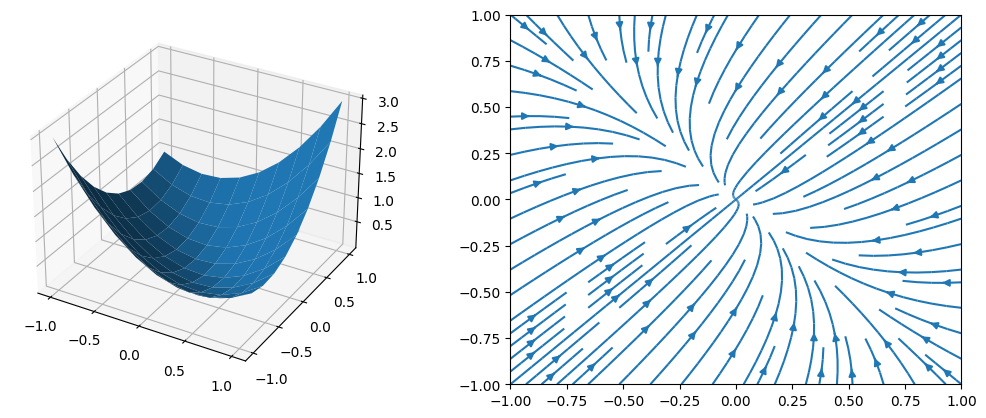

In [4]:
C = np.array([[1, 0.5], [0.5, 1]])
plot_gradient_flow(C)

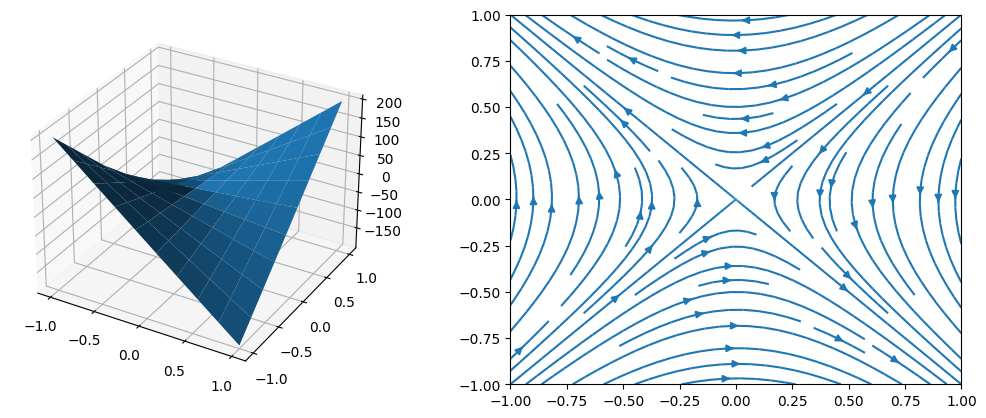

In [5]:
D = np.array([[1, 100], [100, 1]])
plot_gradient_flow(D)

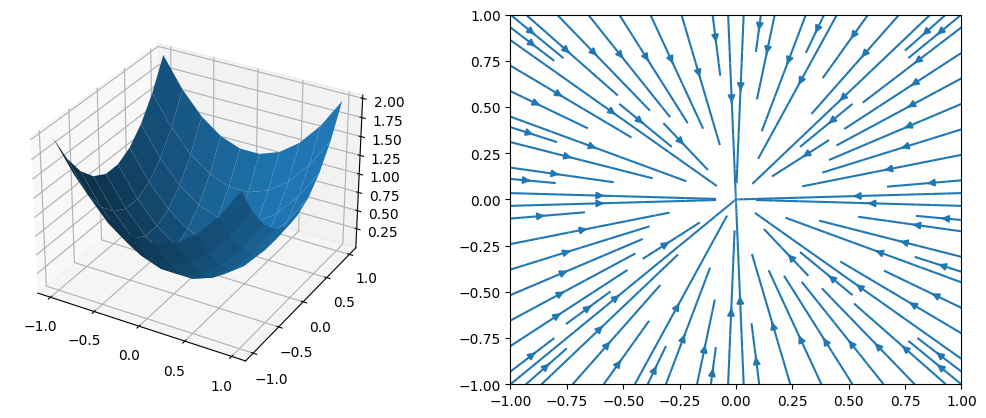

In [6]:
E = np.array([[1, 0], [0, 1]])
plot_gradient_flow(E)

As we may notice, $A$, $B$ and $C$ have the same gradient flow diagram, while $D$ and $E$ are different.

Hence, the experiment shows that the anti-symmetric part does not matter as long as the sum of diagonal keeps as constant.

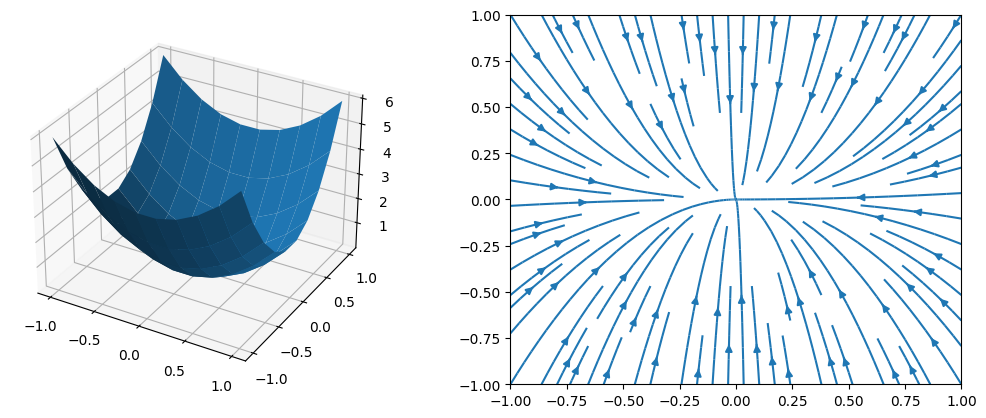

In [7]:
F = np.array([[2, 0], [0, 4]])
plot_gradient_flow(F)

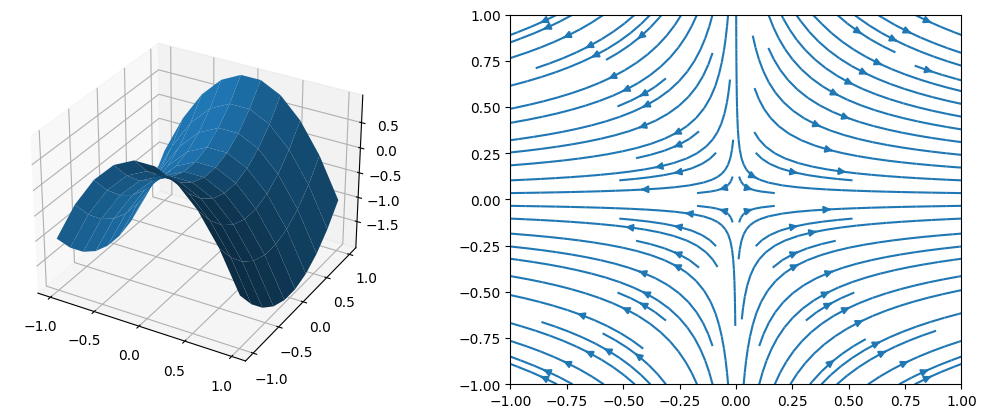

In [14]:
G = np.array([[-2, 0], [0, 4]])
plot_gradient_flow(F)

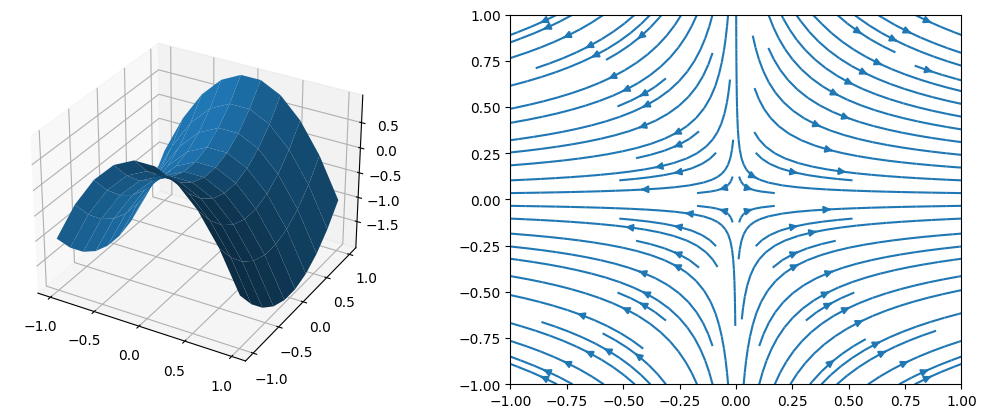

In [15]:
H = np.array([[-2, 0], [0, -4]])
plot_gradient_flow(F)

$F$ has two different positive eigenvalues, $G$ has one positive eigenvalue and one negative eigenvalue, and $H$ has two different negative eigenvalues.

The experiment shows that when there exists a negative eigenvalue, the gradient descent flow diagram tends to diverge

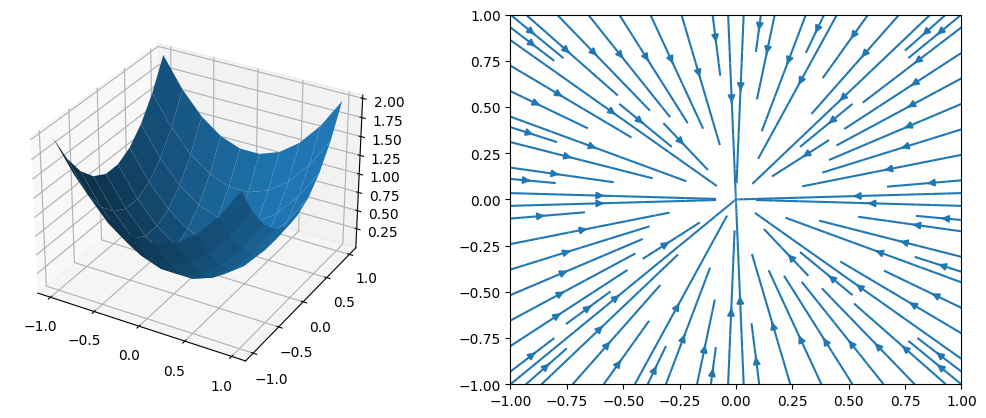

In [18]:
I = np.array([[1, 0], [0, 1]])
plot_gradient_flow(I)

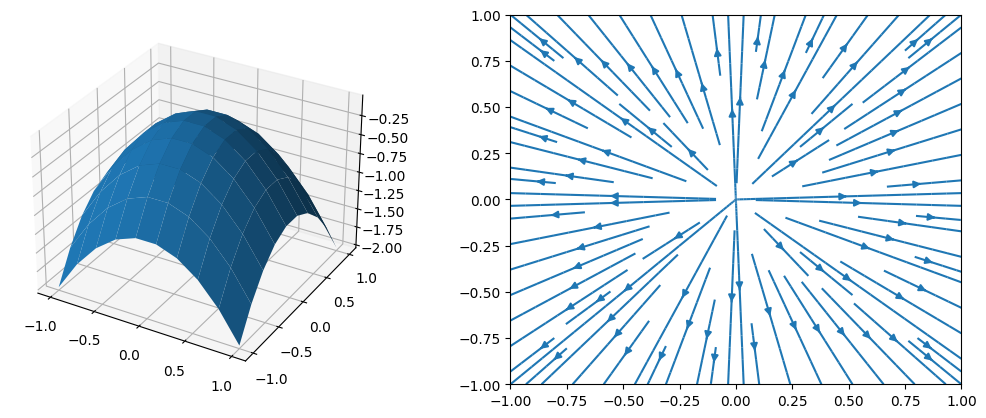

In [19]:
J = np.array([[-1, 0], [0, -1]])
plot_gradient_flow(J)

$I$ has only one positive eigenvalue, $J$ has only one negative eigenvalue.

The experiment also shows that when there exists a negative eigenvalue, the gradient descent flow diagram tends to diverge

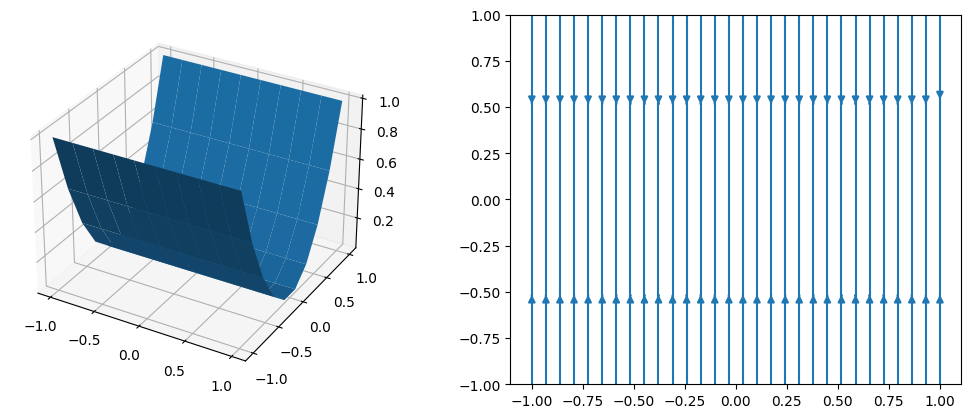

In [25]:
P = np.array([[0, 0], [0, 1]])
plot_gradient_flow(P)

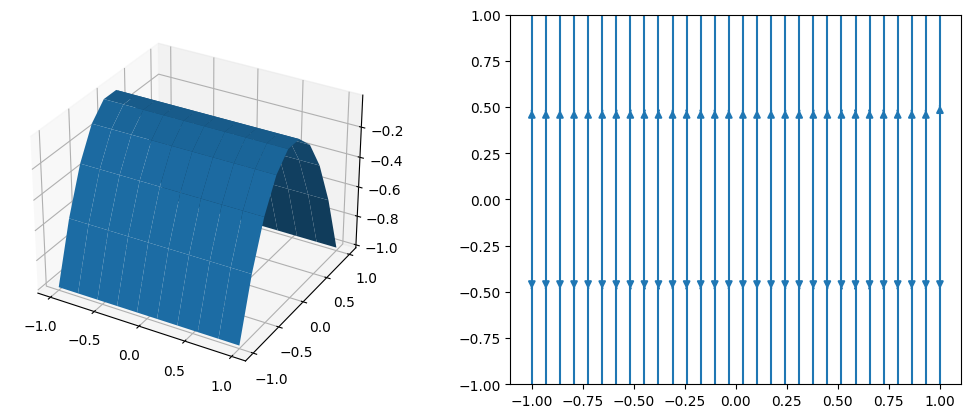

In [26]:
Q = np.array([[0, 0], [0, -1]])
plot_gradient_flow(Q)

$P$ has one eigenvalue equals to zero and one positive eigenvalue, $Q$ has one eigenvalue equals to zero and one negative eigenvalue 

The experiment also shows that when there exists a negative eigenvalue, the gradient descent flow diagram tends to diverge

Hence, from the above experiments, the following conclusion could be drawn:

When the target matrix has a negative eigenvalue, the gradient descent will not converge. Otherwise, it will converge.